In [1]:
#Import python scientific libraries
import pandas as pd
import numpy as np
import scipy as sc

#Import plotting libraries
import matplotlib.pyplot as plt
from seaborn import heatmap

#Import preprocessing methods
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Import metrics and model selection methods from scikit learn
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Import models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

# 1 - Load Data

In [2]:
train_data = pd.read_csv('train_auto.csv')
test_data = pd.read_csv('test_auto.csv')
train_data.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


- Display the first row and all its features

In [48]:
train_data.iloc[0]

INDEX                            1
TARGET_FLAG                      0
TARGET_AMT                       0
KIDSDRIV                         0
AGE                             60
HOMEKIDS                         0
YOJ                             11
INCOME                     $67,349
PARENT1                         No
HOME_VAL                        $0
MSTATUS                       z_No
SEX                              M
EDUCATION                      PhD
JOB                   Professional
TRAVTIME                        14
CAR_USE                    Private
BLUEBOOK                   $14,230
TIF                             11
CAR_TYPE                   Minivan
RED_CAR                        yes
OLDCLAIM                    $4,461
CLM_FREQ                         2
REVOKED                         No
MVR_PTS                          3
CAR_AGE                         18
URBANICITY     Highly Urban/ Urban
Name: 0, dtype: object

# 2 - Data Analysis

- Overview of the data

In [18]:
data = train_data

print('Data general description of training data :')
print('\n - number of rows = ', len(data.index))
print('\n - number of columns = ', len(data.columns))
print('\n - number of columns = ', len(data.columns))
print('\n - number of missing values (total) =' , data.isna().sum().sum())
print('\n - number of duplicated rows = ' , data.duplicated().sum())
print('\n - columns = ' , data.columns.values)

Data general description of training data :

 - number of rows =  8161

 - number of columns =  26

 - number of columns =  26

 - number of missing values (total) = 2405

 - number of duplicated rows =  0

 - columns =  ['INDEX' 'TARGET_FLAG' 'TARGET_AMT' 'KIDSDRIV' 'AGE' 'HOMEKIDS' 'YOJ'
 'INCOME' 'PARENT1' 'HOME_VAL' 'MSTATUS' 'SEX' 'EDUCATION' 'JOB'
 'TRAVTIME' 'CAR_USE' 'BLUEBOOK' 'TIF' 'CAR_TYPE' 'RED_CAR' 'OLDCLAIM'
 'CLM_FREQ' 'REVOKED' 'MVR_PTS' 'CAR_AGE' 'URBANICITY']


- General statistics

In [22]:
train_data.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,33.485725,5.351305,0.798554,1.695503,8.328323
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,15.908333,4.146635,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000


- Search for duplicates and missing values in each columns :
The following columns contain missing values --> YOJ, JOB, INCOME, HOME_VAL, CAR_AGE. No problematic duplicates are observed. Serveral features have dtypes that are neither int, float nor string, and that should be fixed.

In [3]:
data =train_data
report = pd.DataFrame(columns =['n_missing' , 'n_duplicates' , 'n_distinct_values', 'dtype'] , index =data.columns)
report['n_missing'] = data.isnull().sum()
report['n_duplicates'] = [data[feature].duplicated().sum() for feature in data.columns ] 
report['n_distinct_values'] = [data[feature].nunique() for feature in data.columns]
report['dtype'] = data.dtypes
report

,n_missing,n_duplicates,n_distinct_values,dtype
INDEX,0,0,8161,int64
TARGET_FLAG,0,8159,2,int64
TARGET_AMT,0,6212,1949,float64
KIDSDRIV,0,8156,5,int64
AGE,6,8100,60,float64
HOMEKIDS,0,8155,6,int64
YOJ,454,8139,21,float64
INCOME,445,1548,6612,object
PARENT1,0,8159,2,object
HOME_VAL,464,3054,5106,object


- Check for imbalances in the target : a small class imbalance is detected, but it is not too important so no upsampling or downsampling will be performed 

In [132]:
train_data.TARGET_FLAG.value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

# 3 - Preprocessing

- Cleaning

In [150]:
def clean_data(input_data) :
    """
    Takes a pandas dataframe as an input and return a copy of this dataframe after computing the following cleaning steps :
    1 - Drop the INDEX attribute that corresponds to a wrong indexation
    2 - Drop Target_AMT in order to avoid divulgating information about the target
    3 - Convert price features to float ( 'INCOME', 'BLUEBOOK', 'HOME_VAL', 'OLDCLAIM')
    4 - Replace missing values using imputers
    5 - Convert categorical features to dummies
    6 - Clean features names with wrong characters
    """
    
    output = input_data.copy()
    
    #1 - Remove the wrong indexation
    output.drop('INDEX', axis = 1, inplace = True)
    
    #2 -Remove Target_AMT
    output.drop('TARGET_AMT', axis = 1, inplace = True)
    
    #3 - Converts prices to float values
    output = convert_price_to_float(output , ['INCOME', 'BLUEBOOK', 'HOME_VAL', 'OLDCLAIM'] )
    
    #4 - Replace missing values
    
    #Use mean imputer for numeric features
    mean_imputer = SimpleImputer(strategy = 'mean')
    output[['AGE' , 'YOJ' , 'INCOME' , 'HOME_VAL' , 'CAR_AGE']] = mean_imputer.fit_transform(output[['AGE' , 'YOJ' ,
                                                                                                     'INCOME' , 'HOME_VAL' ,
    #Use most frequent imputer for cqtegorical features                                                                                               'CAR_AGE']])
    mostfrequent_imputer = SimpleImputer(strategy = 'most_frequent')
    
    output[['JOB']] = mostfrequent_imputer.fit_transform(output[['JOB']])

    #5 - Get dummies
    output = pd.get_dummies(output, drop_first = True)
    
    #6 - Clean features names (remove spaces and '_z')
    old_names = output.columns
    new_names = { old_name : old_name.replace(' ', '_').replace('_z', '') for old_name in old_names}
    
    output = output.rename(columns = new_names)
    
    return output



def convert_price_to_float(dataframe , features) :
    """
    Convert the specified features of a dataframe from string prices to float numbers
    """
    def price_to_float(string_price) :
        """
        Converts a string price into its float value
        """
        #removes dollar signs and replace coma by dot to enable float conversion
        new_string = str(string_price).replace('$' , '').replace(',' , '.')
        
        return(float(new_string))
                                                                                            
    for feature in features :
        dataframe[feature]= dataframe[feature].map(lambda x : price_to_float(x))
    return dataframe


clean_train_data = clean_data(train_data)
clean_train_data.columns

Index(['TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ',
       'MVR_PTS', 'CAR_AGE', 'PARENT1_Yes', 'MSTATUS_No', 'SEX_F',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_High_School', 'JOB_Doctor', 'JOB_Home_Maker', 'JOB_Lawyer',
       'JOB_Manager', 'JOB_Professional', 'JOB_Student', 'JOB_Blue_Collar',
       'CAR_USE_Private', 'CAR_TYPE_Panel_Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_Sports_Car', 'CAR_TYPE_Van', 'CAR_TYPE_SUV', 'RED_CAR_yes',
       'REVOKED_Yes', 'URBANICITY_Highly_Rural/_Rural'],
      dtype='object')

- Scaling the non categorical features : [ 'AGE', 'YOJ', 'HOME_VAL' , 'CAR_AGE' , 'INCOME' , 'BLUEBOOK', 'OLDCLAIM' , 'TRAVTIME', 'HOMEKIDS', 'MVR_PTS', 'TIF' , 'KIDSDRIV']


In [152]:
class Scaling :
    """
    Applies standard_scaling to a dataframe
    """
    def __init__(self ,  cols_to_std = []) :
        self.cols_to_std = cols_to_std 
        self.standard_scaler = StandardScaler()
        
    def fit_transform(self , dataframe) :
        scaled_df = dataframe.copy()
        scaled_df[self.cols_to_std] = self.standard_scaler.fit_transform(dataframe[self.cols_to_std])
        return scaled_df
    
    def transform(self , dataframe) :
        scaled_df = dataframe.copy()
        scaled_df[self.cols_to_std] = self.standard_scaler.transform(dataframe[self.cols_to_std])
        return scaled_df
    
cols_to_std = [ 'AGE', 'YOJ', 'HOME_VAL' , 'CAR_AGE' , 'INCOME' , 'BLUEBOOK', 'OLDCLAIM' , 'TRAVTIME', 'HOMEKIDS', 'MVR_PTS', 
               'TIF' , 'KIDSDRIV']
scaling = Scaling(cols_to_std)
scaled_train_data = scaling.fit_transform(clean_train_data)
scaled_train_data.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,...,JOB_Blue_Collar,CAR_USE_Private,CAR_TYPE_Panel_Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports_Car,CAR_TYPE_Van,CAR_TYPE_SUV,RED_CAR_yes,REVOKED_Yes,URBANICITY_Highly_Rural/_Rural
0,0,-0.334421,1.763669,-0.646120,1.259101e-01,0.043855,-1.235073,-1.224950,-0.175776,1.362319,...,0,1,0,0,0,0,0,1,0,0
1,0,-0.334421,-0.207599,-0.646120,1.259101e-01,0.451744,0.816522,-0.722038,-0.091445,-1.049422,...,1,0,0,0,0,0,0,1,0,0
2,0,-0.334421,-1.135255,0.249732,-1.255512e-01,-0.824561,-0.244645,-1.790726,-1.389666,-0.325900,...,0,1,0,0,0,0,1,0,0,0
3,0,-0.334421,0.720057,-0.646120,8.802942e-01,0.000000,1.207291,-0.093399,-0.032058,0.397623,...,1,1,0,0,0,0,0,1,0,0
4,0,-0.334421,0.604100,-0.646120,4.466851e-16,0.850105,0.710239,0.158057,0.272009,-1.049422,...,0,1,0,0,0,0,1,0,1,0


# 4 - Create testing and training sets

In [153]:
#Extracting features
X_train = train_data.loc[ : , train_data.columns != 'TARGET_FLAG']
X_test = test_data.loc[ : , test_data.columns != 'TARGET_FLAG']

#Preprocessing (Scaling and cleaning)
cols_to_std = [ 'AGE', 'YOJ', 'HOME_VAL' , 'CAR_AGE' , 'INCOME' , 'BLUEBOOK', 'OLDCLAIM' , 'TRAVTIME', 
               'HOMEKIDS', 'MVR_PTS', 'TIF' , 'KIDSDRIV']
scaling = Scaling(cols_to_std)

X_train = scaling.fit_transform(clean_data(X_train))
X_test = scaling.transform(clean_data(X_test))

#Extracting target
y_train = train_data['TARGET_FLAG']

# 5 - Studying Features interaction

- Correlation heatmap of features : no dramatic correlation is identified

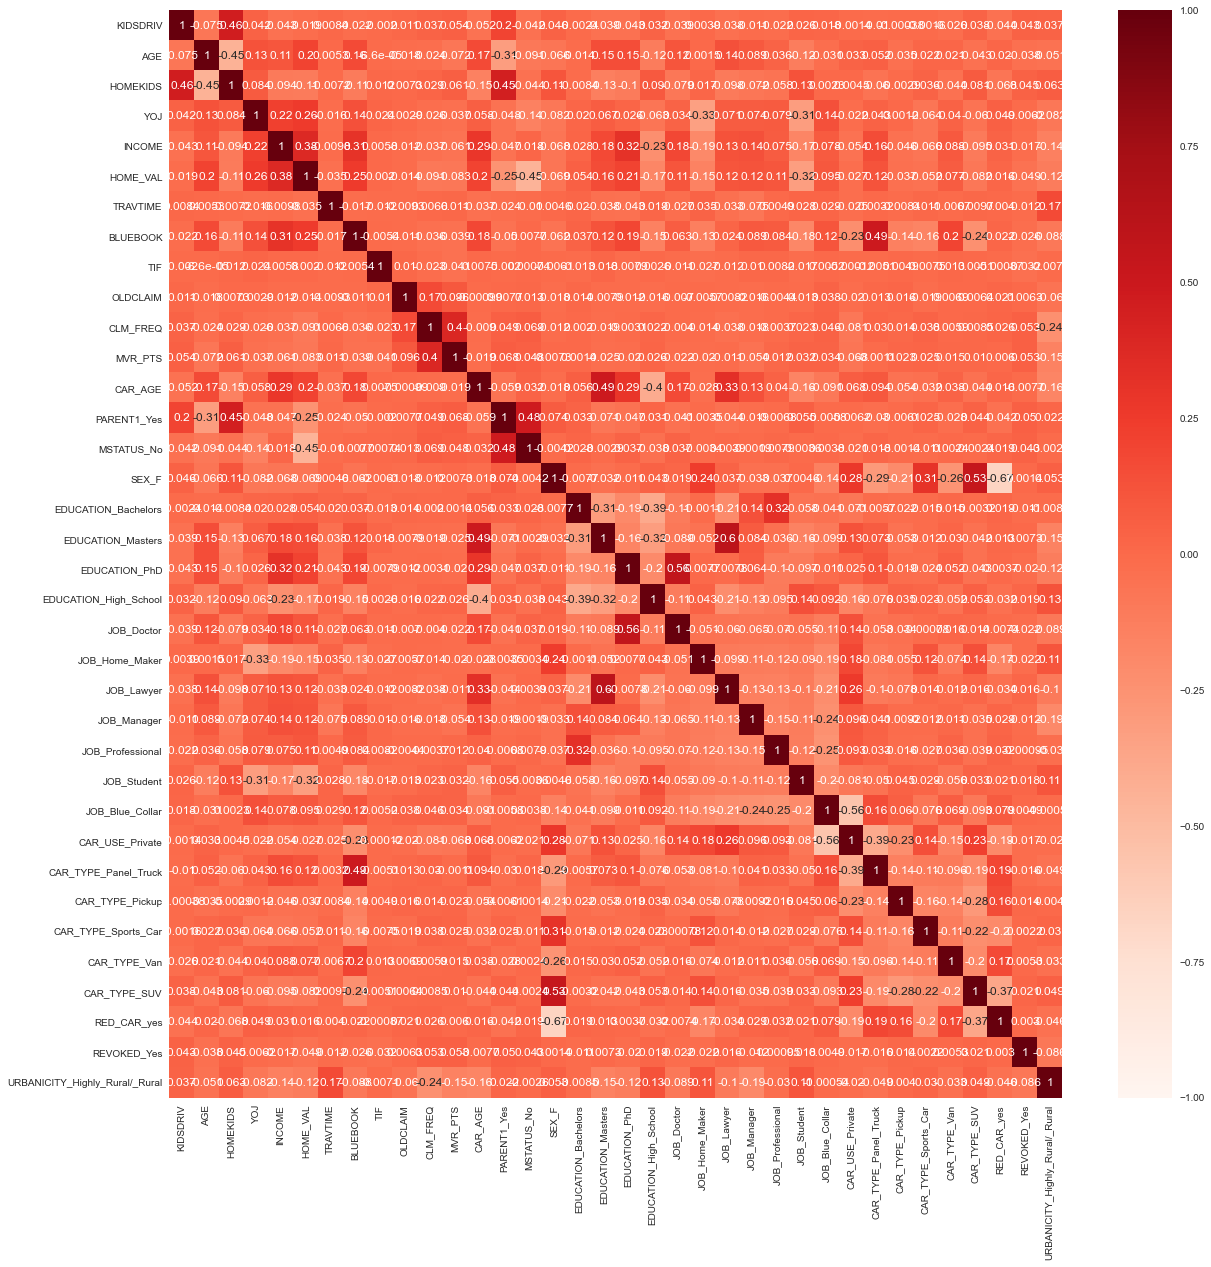

In [124]:
fig,ax = plt.subplots(figsize = (20,20))
corr_method = 'kendall' #'pearson' #spearman or kendall
heatmap( X_train.corr(), annot = True, ax=ax, vmin = -1, vmax = 1, cmap = 'Reds')
plt.show()

# 6 - Model selection

- Initializing models

In [119]:

dummy  = DummyClassifier()
logistic_reg = LogisticRegression()
svc = SVC()
rdf = RandomForestClassifier()
xgbc = XGBClassifier()

#Storing models in a dictionary
models = {'dummy_classifier' : dummy , 'logistic_regression' : logistic_reg, 'random_forest' : rdf , 
          'xgboost' : xgbc , 'svc' : svc }  

- Performing cross validation on several models to search for the best one

In [ ]:
n_splits = 10 #cross validation splits

cv_results ={} #initiating a dict to store results

summary = pd.DataFrame( index = models.keys()) #initiating a dataframe to store a syummary

for model_name in models :
    
    model = models[model_name]
    cv = cross_validate(model, X_train, y_train, cv = n_splits, scoring = ['f1' , 'precision' , 'recall' , 'roc_auc'])
   
    cv_results[model_name] = cv
    
    summary.loc[model_name , list(cv.keys())] = [np.mean(array) for array in list(cv.values())]

- The summary indicates that the most appropriate model would be xgboost, on the basis of the f1 and roc_auc scores

In [127]:
summary

,fit_time,score_time,test_f1,test_precision,test_recall,test_roc_auc
dummy_classifier,0.018243,0.032296,0.262620,0.260426,0.265211,0.495831
logistic_regression,0.301914,0.046072,0.506864,0.661512,0.411550,0.807115
random_forest,5.334531,0.307977,0.464420,0.672518,0.355801,0.806228
xgboost,4.382668,0.094738,0.528665,0.622912,0.460745,0.801339
svc,10.851530,1.556043,0.465278,0.687912,0.352506,0.795103


- Searchin quickly for the best parameters for the selected model (this is just a quick example)

In [ ]:
model = xgbc

parameters ={'learning_rate' : [.001, 0.01, .1],
             'max_depth': [2 , 6 , 10 ]}  #Parameters to be tested

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring =['f1' , 'roc_auc'], 
                           cv=5, refit ='f1')

grid_search.fit(X_train , y_train)

- Extracting best parameters and evaluating model performance

In [175]:
#Extracting results of the best run
best_model = grid_search.best_estimator_
f1_best_run = grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]
roc_auc_best_run = grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]

#Print results
print('Perfomed cross validation')
print('- f1 score of the best model : f1_score = {:.2f} '.format(f1_best_run))
print('- ROC AUC score of the best model : f1_score = {:.2f} '.format(roc_auc_best_run))

Perfomed cross validation
- f1 score of the best model : f1_score = 0.54 
- ROC AUC score of the best model : f1_score = 0.81 


# 6 - Prediction on test set

In [199]:
test_prediction = pd.DataFrame({'TARGET_FLAG' : best_model.predict(X_test)}) #Predict labels on test set
test_prediction.index.name = 'INDEX'
test_prediction['TARGET_FLAG'] = test_prediction['TARGET_FLAG'].map(lambda x : float(x)) #convert labels to float in order to have 0 on the csv
test_prediction.to_csv('my_prediction.csv', sep = ',')  #Save the result as csv file